In [1]:
import pandas as pd
import requests as req
import matplotlib.pyplot as plt

In [2]:
ta = pd.read_csv(r'C:\Users\yj_pc\Desktop\berlin\htw berlin\MPMD_Dateien\3.1 PM & Data Analytics Lab\electricity_data\.ta_original_data.csv')
ta.rename(columns={'Unnamed: 0': 'Timestamp'}, inplace=True)
ta.set_index('Timestamp', inplace=True)
ta = ta.reindex(pd.date_range(ta.index.min(), ta.index.max(), freq="H"))

In [3]:
def fetch_segmented_data(year, from_month=0, to_month=0):
    if from_month > 0 and to_month > 0:
        return ta[(ta.index.year == year) & (ta.index.from_month >= from_month) & (ta.index.to_month <= to_month)]
    else:
        return ta[(ta.index.year == year)]

In [4]:
# for outliers
# x = la_2018[(la_2018['demand'] - la_2018['forecast'])<1000]['demand']
# y = la_2018[(la_2018['demand'] - la_2018['forecast'])<1000]['forecast']

In [4]:
def fetch_daily_avg_temperatures(year):
    first_half = pd.read_csv('https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&startDate={}-01-01T00:00:00z&endDate={}-05-31&stations=USW00093805'.format(year, year))
    second_half = pd.read_csv('https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&startDate={}-06-01T00:00:00z&endDate={}-12-31&stations=USW00093805'.format(year, year))
    relevant_first_half = first_half[['DATE', 'TMAX', 'TMIN']]
    relevant_second_half = second_half[['DATE', 'TMAX', 'TMIN']]
    
    combined_per_year = pd.concat([relevant_first_half, relevant_second_half])
    combined_per_year['TMAX'] = combined_per_year['TMAX']/10
    combined_per_year['TMIN'] = combined_per_year['TMIN']/10
    combined_per_year['DATE'] = pd.to_datetime(combined_per_year['DATE'])
    return combined_per_year.set_index('DATE')


In [5]:
def fetch_hourly_temperatures(year):
    first_half = pd.read_csv('https://www.ncei.noaa.gov/access/services/data/v1?dataset=normals-hourly&startDate={}-01-01T00:00:00z&endDate={}-05-31&stations=USW00093805'.format(year, year))
    second_half = pd.read_csv('https://www.ncei.noaa.gov/access/services/data/v1?dataset=normals-hourly&startDate={}-06-01T00:00:00z&endDate={}-12-31&stations=USW00093805'.format(year, year))
    relevant_first_half = first_half[['DATE', 'HLY-TEMP-NORMAL', 'HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL']]
    relevant_second_half = second_half[['DATE', 'HLY-TEMP-NORMAL', 'HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL']]
    combined_per_year = pd.concat([relevant_first_half, relevant_second_half])
    combined_per_year['HLY-TEMP-10PCTL'] = combined_per_year['HLY-TEMP-10PCTL']/10
    combined_per_year['HLY-TEMP-90PCTL'] = combined_per_year['HLY-TEMP-90PCTL']/10
    combined_per_year['DATE'] = str(year) + '-' + combined_per_year['DATE']
    combined_per_year['DATE'] = pd.to_datetime(combined_per_year['DATE'])
    return combined_per_year.set_index('DATE')


In [7]:
ta_2015 = fetch_segmented_data(2015)
ta_2016 = fetch_segmented_data(2016)
ta_2017 = fetch_segmented_data(2017)
ta_2018 = fetch_segmented_data(2018)
ta_2019 = fetch_segmented_data(2019)

In [8]:
temp_daily_2015 = fetch_daily_avg_temperatures(2015)
temp_daily_2016 = fetch_daily_avg_temperatures(2016)
temp_daily_2017 = fetch_daily_avg_temperatures(2017)
temp_daily_2018 = fetch_daily_avg_temperatures(2018)
temp_daily_2019 = fetch_daily_avg_temperatures(2019)

In [6]:
temp_hourly_2015 = fetch_hourly_temperatures(2015)
temp_hourly_2016 = fetch_hourly_temperatures(2016)
temp_hourly_2017 = fetch_hourly_temperatures(2017)
temp_hourly_2018 = fetch_hourly_temperatures(2018)
temp_hourly_2019 = fetch_hourly_temperatures(2019)

In [7]:
temp_daily_2015.tail(n=100)

NameError: name 'temp_daily_2015' is not defined

In [9]:
temp_hourly = pd.concat([temp_hourly_2015,temp_hourly_2016,temp_hourly_2017,temp_hourly_2018,temp_hourly_2019])

In [11]:
temp_hourly.tail()

,HLY-TEMP-NORMAL,HLY-TEMP-10PCTL,HLY-TEMP-90PCTL
DATE,,,
2019-12-31 19:00:00,535,39.0,66.9
2019-12-31 20:00:00,511,36.0,64.9
2019-12-31 21:00:00,496,34.0,64.9
2019-12-31 22:00:00,486,32.0,64.9
2019-12-31 23:00:00,478,30.9,64.0


In [12]:
temp_hourly.to_csv(r'C:\Users\yj_pc\Desktop\berlin\htw berlin\MPMD_Dateien\3.1 PM & Data Analytics Lab\electricity_data\ta_temp_hourly.csv')

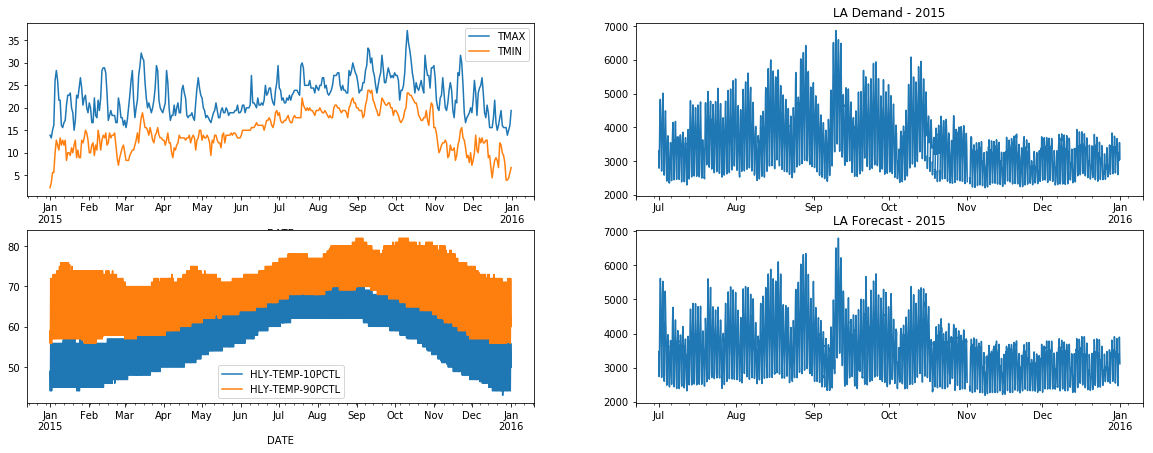

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
temp_daily_2015.plot(ax=axes[0,0])
la_2015['demand'].plot(ax=axes[0,1], title='LA Demand - 2015')
temp_hourly_2015[['HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL']].plot(ax=axes[1,0])
la_2015['forecast'].plot(ax=axes[1,1], title='LA Forecast - 2015');

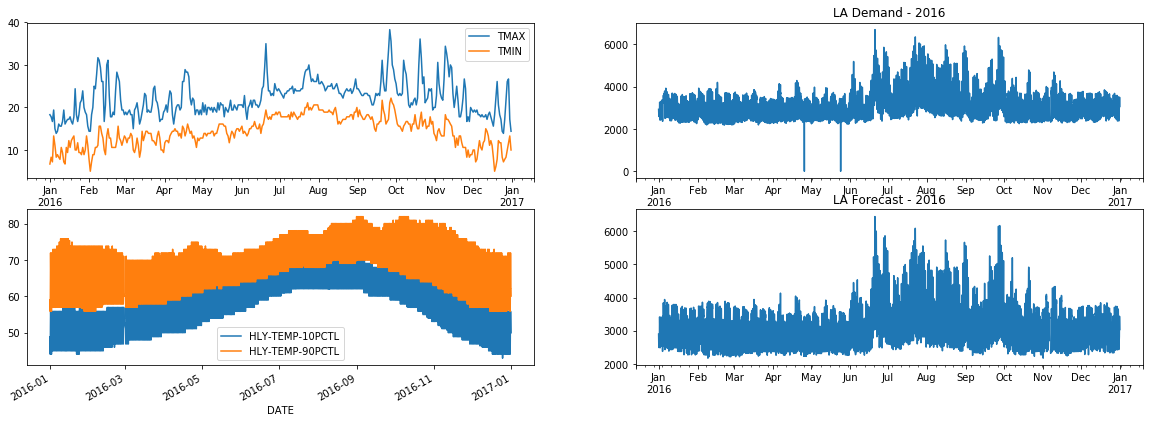

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
temp_daily_2016.plot(ax=axes[0,0])
la_2016['demand'].plot(ax=axes[0,1], title='LA Demand - 2016')
temp_hourly_2016[['HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL']].plot(ax=axes[1,0])
la_2016['forecast'].plot(ax=axes[1,1], title='LA Forecast - 2016');

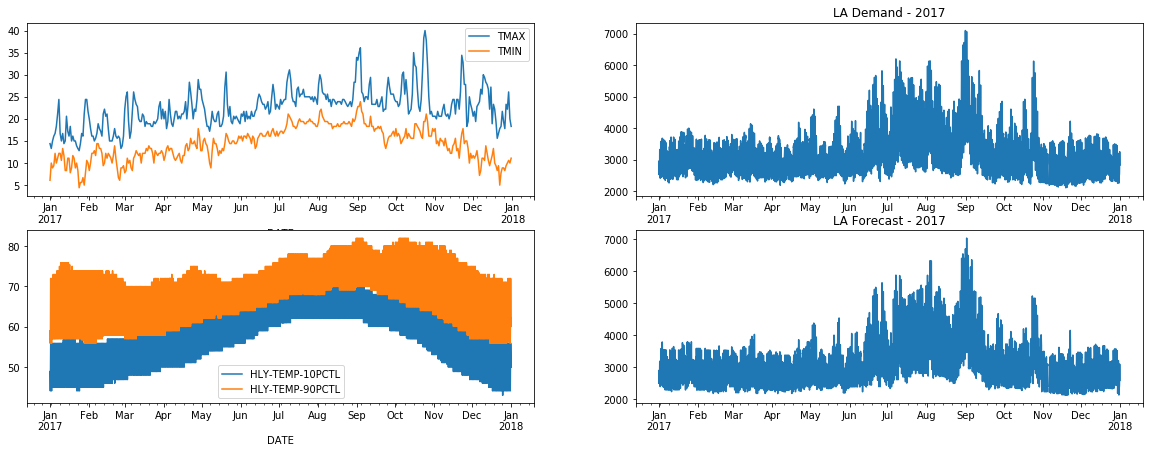

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
temp_daily_2017.plot(ax=axes[0,0])
la_2017['demand'].plot(ax=axes[0,1], title='LA Demand - 2017')
temp_hourly_2017[['HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL']].plot(ax=axes[1,0])
la_2017['forecast'].plot(ax=axes[1,1], title='LA Forecast - 2017');

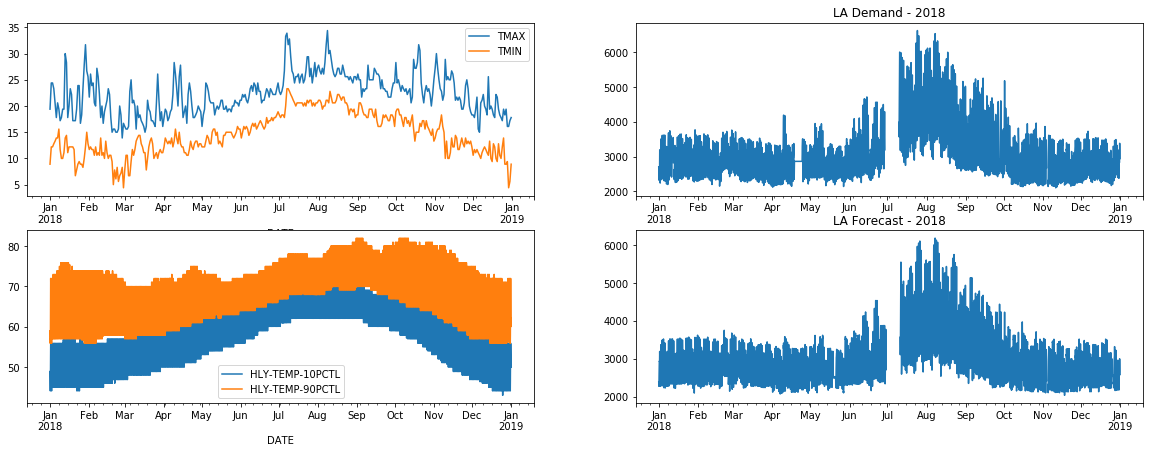

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
temp_daily_2018.plot(ax=axes[0,0])
la_2018['demand'].plot(ax=axes[0,1], title='LA Demand - 2018')
temp_hourly_2018[['HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL']].plot(ax=axes[1,0])
la_2018['forecast'].plot(ax=axes[1,1], title='LA Forecast - 2018');

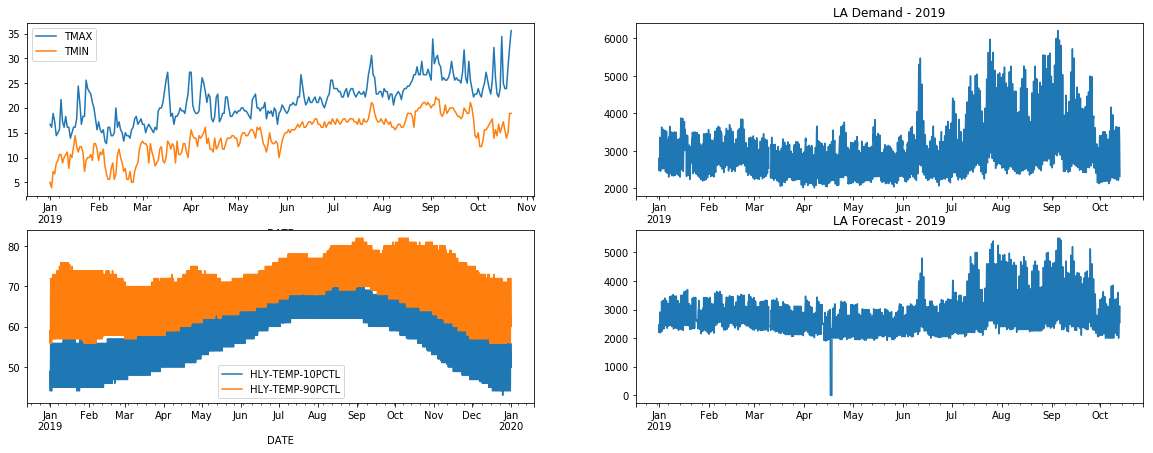

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
temp_daily_2019.plot(ax=axes[0,0])
la_2019['demand'].plot(ax=axes[0,1], title='LA Demand - 2019')
temp_hourly_2019[['HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL']].plot(ax=axes[1,0])
la_2019['forecast'].plot(ax=axes[1,1], title='LA Forecast - 2019');